In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris_data = pd.read_excel('/content/iris_1.xls')
iris_data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
print(iris_data.info())
print(iris_data.isna().sum())
print(iris_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64
               SL          SW          PL          PW
count  150.000000  150.000000  150.000000  150.000000
mean     5.843333    3.054000    3.758667    1.198667
std      0.828066    0.433594    1.764420    0.763161
min      4.300000    2.000000    1.000000    0.100000
25%      5.100000    2.800000    1.600000    0.300000
50%      5.800000    3.000000    4.350000    1.300000
75%      6.400000    3.300000    

In [4]:
print(iris_data['Classification'].unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [5]:
#label encoding for 'Classification'

import sklearn.preprocessing as sk
x_le = sk.LabelEncoder()
iris_data['Classification'] = x_le.fit_transform(iris_data['Classification'])

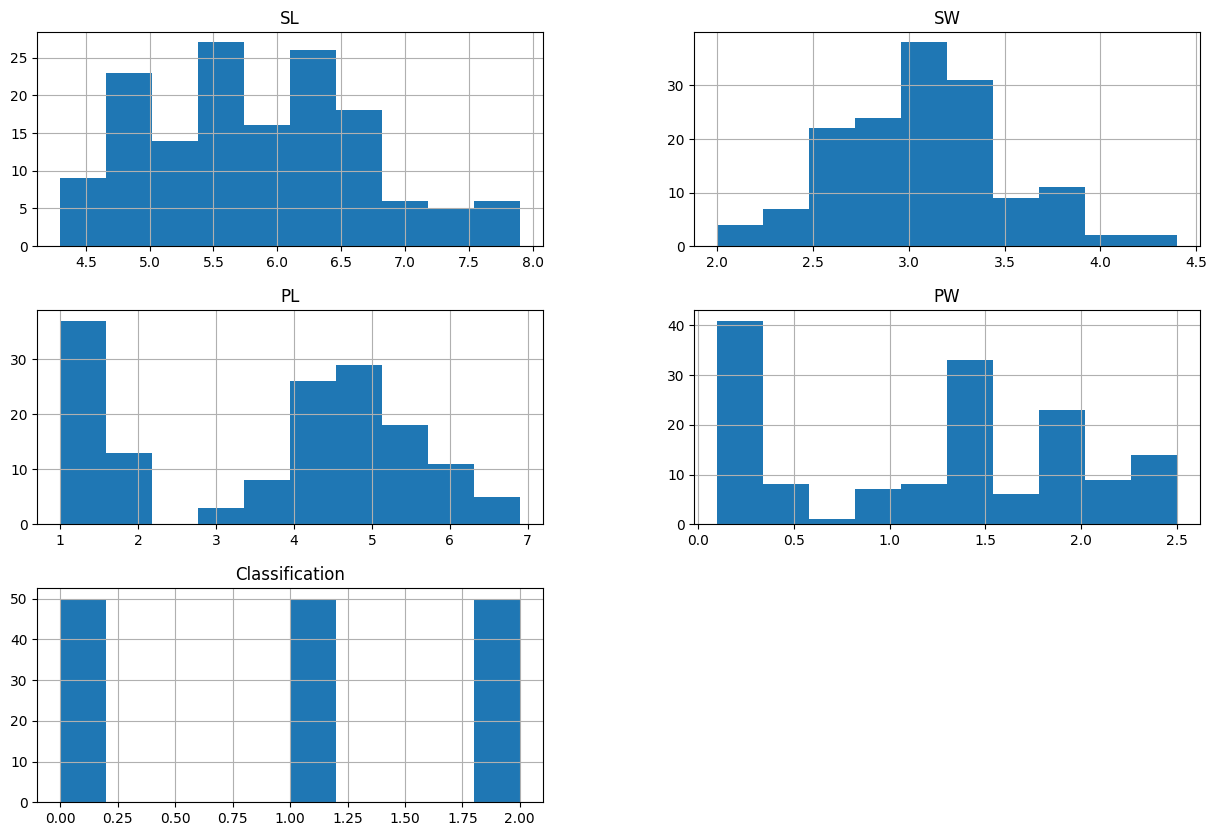

In [6]:
graph_val = iris_data.select_dtypes(['float64','int64','int32'])
graph_val.hist(figsize = (15,10))
plt.show()

checking outliers

<Axes: >

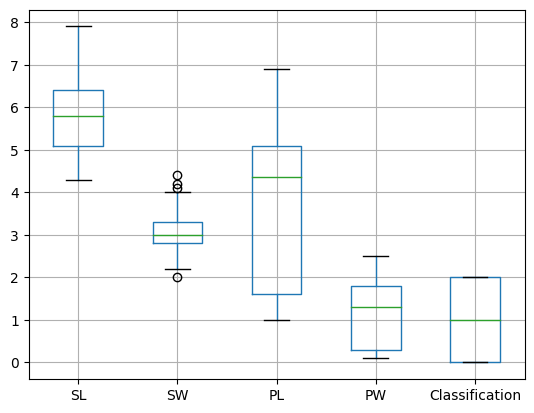

In [7]:
graph_val.boxplot()

In [8]:
#Outliers handling for SW

q1 = np.percentile(iris_data['SW'], 25, method = 'midpoint')
q2 = np.percentile(iris_data['SW'], 50, method = 'midpoint')
q3 = np.percentile(iris_data['SW'], 75, method = 'midpoint')
print('q1 for SW: ',q1,'\nq2 for SW: ',q2,'\nq3 for SW: ',q3)
IQR = q3-q1
print('IQR for SW: ',IQR)
low_lim = q1 - 1.5*IQR
up_lim = q3 + 1.5*IQR
print('lower whisker for SW: ', low_lim,'\nupper whisker for SW :', up_lim)

outlier =[]
for x in iris_data['SW']:
  if(x<low_lim or x>up_lim):
    outlier.append(x)
print('Outlier for SW: ',outlier)

q1 for SW:  2.8 
q2 for SW:  3.0 
q3 for SW:  3.3
IQR for SW:  0.5
lower whisker for SW:  2.05 
upper whisker for SW : 4.05
Outlier for SW:  [4.4, 4.1, 4.2, 2.0]


In [9]:
#data clipping to optimize outliers

iris_data['SW'] = iris_data['SW'].clip(lower = low_lim, upper = up_lim)

<Axes: >

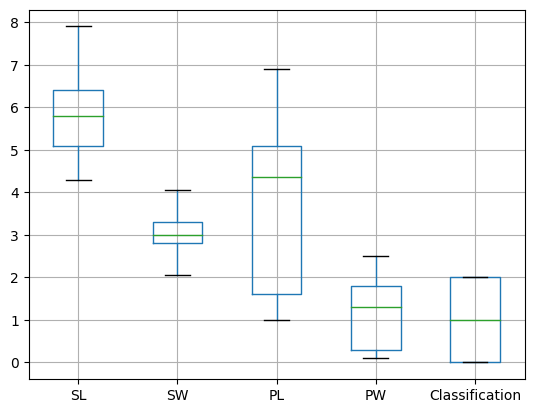

In [11]:
iris_data.boxplot()

<Axes: >

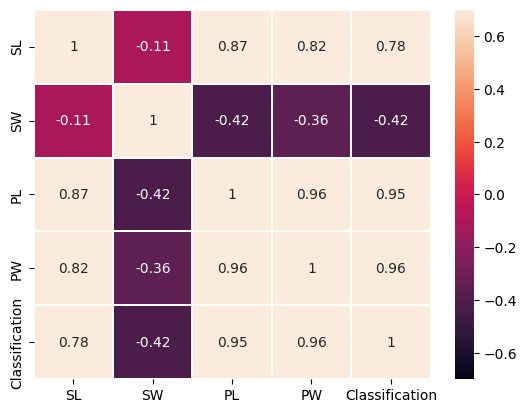

In [12]:
#check correlation

sns.heatmap(iris_data.corr(),vmin = -0.7, vmax = 0.7, annot = True, linewidths = 0.2)


In [13]:
# we can see that there is high correlation between PL-SL, PL-PW, PW-SL
# Hence keeping only PW and SW values

#dropping highly correlated columns
iris_data.drop(['PL', 'SL'], axis = 1, inplace = True)

<Axes: >

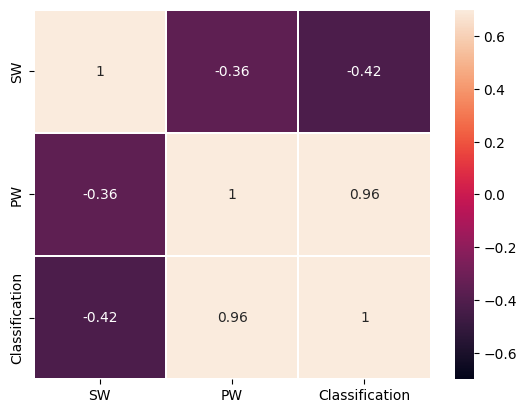

In [14]:
sns.heatmap(iris_data.corr(),vmin = -0.7, vmax = 0.7, annot = True, linewidths = 0.2)

**Regression**

In [15]:
#Splitting dependent and independent features

y_iris = iris_data['Classification']
X_iris = iris_data.drop(['Classification'], axis =1)

In [16]:
#splitting to train and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, random_state = 42, test_size = .25)

In [17]:
#fitting train sets into linear model

from sklearn import linear_model
lm = linear_model.LinearRegression()
model_iris = lm.fit(X_train, y_train)

In [18]:
#doing prediction on test set

pred_iris = model_iris.predict(X_test)
pred_iris

array([ 1.06078075, -0.03204261,  2.19034385,  1.33768253,  1.25882389,
        0.14763066,  1.1396394 ,  2.08952923,  1.478823  ,  1.08094368,
        1.7723016 , -0.06878235, -0.0705754 , -0.08894527, -0.03204261,
        1.3560524 ,  2.01067058,  1.02224796,  1.15980232,  2.05099643,
       -0.01008663,  1.61458431,  0.14763066,  1.95197486,  1.65132405,
        2.10969215,  1.71539893,  2.0693663 ,  0.12926079,  0.0100763 ,
       -0.09073833,  0.01657165,  1.19833511, -0.05041248, -0.01008663,
        1.8144205 ,  1.27719376, -0.0705754 ])

In [19]:
#to check model goodness

from sklearn.metrics import mean_squared_error
print('MSE is: ', mean_squared_error(y_test, pred_iris))

#better if closer to 0

MSE is:  0.034443153026027636
